Unlock segy files 

In [1]:
import segyio
import matplotlib.pyplot as plt

filename = 'Kerry3D.segy'

for iline in range(1, 90):
    for xline in range(1, 90):
        try:
            with segyio.open(filename, iline=iline, xline=xline) as segyfile:
                print(f"SEGY file opened successfully with iline={iline} and xline={xline}")
                print(f"Number of ilines: {segyfile.ilines}")
                print(f"Number of xlines: {segyfile.xlines}")
                break
        except:
            continue

SEGY file opened successfully with iline=1 and xline=9
Number of ilines: [     1      2      3 ... 210943 210944 210945]
Number of xlines: [0]
SEGY file opened successfully with iline=5 and xline=9
Number of ilines: [     1      2      3 ... 210943 210944 210945]
Number of xlines: [0]
SEGY file opened successfully with iline=9 and xline=1
Number of ilines: [0]
Number of xlines: [     1      2      3 ... 210943 210944 210945]
SEGY file opened successfully with iline=13 and xline=1
Number of ilines: [0]
Number of xlines: [     1      2      3 ... 210943 210944 210945]
SEGY file opened successfully with iline=17 and xline=1
Number of ilines: [288]
Number of xlines: [     1      2      3 ... 210943 210944 210945]
SEGY file opened successfully with iline=21 and xline=73
Number of ilines: [ 58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108

Read segy file

In [3]:
import numpy as np 
import segyio
import matplotlib.pyplot as plt
import os
#with segyio.open(r'SEAM.sgy') as segyfile:
with segyio.open(r'Dutch_Government_F3_entire_8bit_seismic.segy') as segyfile:
#with segyio.open(r'Kerry3D.segy',iline=73, xline=21) as segyfile:
#with segyio.open(r'tpot.sgy', iline =13, xline =17) as segyfile:
#with segyio.open(r'3D-Waipuku.sgy', iline=5, xline =17) as segyfile:
#with segyio.open(r'Kahu3D.sgy', iline=13, xline =17) as segyfile:
#with segyio.open(r'volve10r12-full-twt-sub3d.sgy') as segyfile:
#with segyio.open(r'Bounty15N_Fault_Prediction.segy') as segyfile:
    data = segyio.tools.cube(segyfile)
    ntraces = segyfile.tracecount
    sr = segyio.tools.dt(segyfile)
    nsamples = segyfile.samples.size
    twt = segyfile.samples + 1000
    size_mb= data.nbytes/1024**2
    inlines = segyfile.ilines
    crosslines = segyfile.xlines
    header = segyio.tools.wrap(segyfile.text[0])
#print(header)
print(data.shape)
print(np.max(data), np.min(data))

(651, 951, 462)
32767.0 -32767.0


Visualize seismic 2D slice

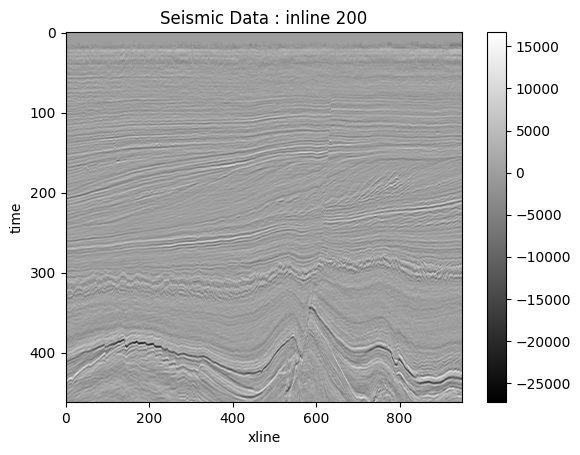

In [5]:
plt.imshow(data[200, :, :].T, cmap='gray', aspect='auto')
plt.colorbar()
plt.xlabel('xline')
plt.ylabel('time')
plt.title('Seismic Data : inline 200')
plt.show()

min-max normalization 1

In [6]:
norm_data=[]
i=0
while i<200:
    slice = data[i,:,:]
    sclip = abs(np.percentile(slice, 0.999))
    xmax, xmin = sclip, -sclip
    slice = (slice - xmin)/(xmax - xmin)
    norm_data.append(slice)
    i=i+1
norm_data = np.array(norm_data)
norm_data = norm_data.astype('float32')

print(f"min : {norm_data.min()}, max : {norm_data.max()}, mean : {norm_data.mean()}, std : {norm_data.std()}")

min : -1.8801822662353516, max : 2.9250295162200928, mean : 0.5000274777412415, std : 0.18789377808570862


min-max normalization 2

In [7]:
norm_data=[]
i=0
while i<200:
    slice = data[i,:,:]
    sclip = abs(np.percentile(slice, 0.999))
    xmax, xmin =slice.max(), slice.min()
    slice = (slice - xmin)/(xmax - xmin)
    norm_data.append(slice)
    i=i+1
norm_data = np.array(norm_data)
norm_data = norm_data.astype('float32')

print(f"min : {norm_data.min()}, max : {norm_data.max()}, mean : {norm_data.mean()}, std : {norm_data.std()}")

min : 0.0, max : 1.0, mean : 0.5190832614898682, std : 0.06535238772630692


Standard or Z-score normalization

In [8]:
norm_data=[]
i=0
norm_data = (data - data.mean())/data.std()
norm_data = np.array(norm_data)
norm_data = norm_data.astype('float32')

print(f"min : {norm_data.min()}, max : {norm_data.max()}, mean : {norm_data.mean()}, std : {norm_data.std()}")

min : -13.400888442993164, max : 13.402533531188965, mean : -6.882193925861202e-09, std : 0.9999987483024597


Save to npy file

In [ ]:
np.save("Datasets/f3_train_data.npy", norm_data)